In [5]:
from utils_all import *
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.manifold import TSNE
import seaborn as sns
%matplotlib inline
import inspect
from sklearn.decomposition import IncrementalPCA
from sklearn import manifold

/Users/jetbrains/miniconda3/envs/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
from time import time
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

In [26]:
%store -r data
%store -r data_t
%store -r df_1_final

In [27]:
data_t

,url,meta_name,text,x_coords,y_coords,block_height,block_width,tag,num_child,num_siblings,...,buffered-rendering,domain,keep,text_str,text_len,num_punctuation,num_digits,digits_share,num_upper,num_space
103,http://www.livenation.com/events/155446-oct-26...,startDate,"Friday Oct 26, 2012at09:00 PM CDT",51,481,22,75,span,NaN,4,...,auto,livenation.com,1,"Friday Oct 26, 2012at09:00 PM CDT",33,2,10,0.303030,7,5
104,http://www.livenation.com/events/213114-jan-31...,startDate,"Thursday Jan 31, 2013at07:30 PM EST",51,717,22,86,span,NaN,4,...,auto,livenation.com,1,"Thursday Jan 31, 2013at07:30 PM EST",35,2,10,0.285714,7,5
105,http://www.livenation.com/events/373699-oct-24...,startDate,"Friday Oct 24, 2014at08:00 PM CDT",51,862,22,83,span,NaN,4,...,auto,livenation.com,1,"Friday Oct 24, 2014at08:00 PM CDT",33,2,10,0.303030,7,5
139,http://mysunshinecoast.com.au/events/events-di...,name,DeepBlue Winter Workshops,69,38,55,193,span,NaN,1,...,auto,mysunshinecoast.com.au,1,DeepBlue Winter Workshops,25,0,0,0.000000,4,2
140,http://mysunshinecoast.com.au/events/events-di...,startDate,Thursday 10th July 2014,126,399,21,207,time,NaN,1,...,auto,mysunshinecoast.com.au,1,Thursday 10th July 2014,23,0,6,0.260870,2,3
141,http://mysunshinecoast.com.au/events/events-di...,location,"Nambour Civic Centre,\r \r Nambour\r ...",69,467,55,274,span,NaN,1,...,auto,mysunshinecoast.com.au,1,"Nambour Civic Centre,\r \r Nambour\r ...",68,1,4,0.058824,5,28
205,http://mysunshinecoast.com.au/events/events-di...,name,Headspace: meditation for study success,69,38,55,295,span,NaN,1,...,auto,mysunshinecoast.com.au,1,Headspace: meditation for study success,39,1,0,0.000000,1,4
206,http://mysunshinecoast.com.au/events/events-di...,startDate,Wednesday 12th October 2011,69,399,55,269,time,NaN,1,...,auto,mysunshinecoast.com.au,1,Wednesday 12th October 2011,27,0,6,0.222222,2,3
207,http://mysunshinecoast.com.au/events/events-di...,location,"Nambour library,\r \r Nambour\r 4...",149,467,21,230,span,NaN,1,...,auto,mysunshinecoast.com.au,1,"Nambour library,\r \r Nambour\r 4...",63,1,4,0.063492,3,27
228,http://mysunshinecoast.com.au/events/events-di...,name,African Dance Workshop,69,38,29,278,span,NaN,1,...,auto,mysunshinecoast.com.au,1,African Dance Workshop,22,0,0,0.000000,3,2


In [28]:
data = df_1_final

In [29]:
data_cl = clean_df(data)

In [30]:
def prepare_num_XY(data_cl, num_features):
    data_cl = data_cl.dropna(axis=0)
    data_num = data_cl[num_features]
    data_num = data_num[data_num.applymap(lambda x: isinstance(x, (int, float)))]
    data_cl[num_features] = data_num
    data_cl = data_cl.dropna(axis=0)
    y = data_cl['meta_name']
    X = data_cl.drop('meta_name', 1)
    le = LabelEncoder()
    le_tag = le.fit_transform(X.tag.values)
    X.loc[:,'tag'] = le_tag
    return X, y, le_tag

In [31]:
data_cl = data_cl[['meta_name','x_coords','y_coords','block_height','block_width','num_siblings', 'tag']]
num_features = ['x_coords','y_coords','block_height','block_width','num_siblings']
X, y, le_tag = prepare_num_XY(data_cl, num_features)

In [32]:
def run_dim_reduction_and_draw(data, labels, model, title):
    X_model = model.fit_transform(data)
    tsne = pd.DataFrame({'x1': X_model[:, 0], 'x2': X_model[:, 1], 'meta_name': labels, })
    tsne_lim = tsne[tsne['meta_name'].isin(['location', 'name', 'description', 'startDate'])]
    tsne_smpl = tsne_lim.sample(n=4000)
    g = sns.lmplot('x1', 'x2', tsne_smpl, hue='meta_name', fit_reg=False, size=8,scatter_kws={'alpha':0.7,'s':60})
    g.axes.flat[0].set_title(title)
    return X_model

### Standartize features

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
sc = StandardScaler()
X_tr = sc.fit_transform(X)

In [35]:
X_tr

array([[-0.01262695, -0.47565341, -0.28371268, -0.98440263,  0.27459752,
         0.39423405],
       [-0.01262695, -0.39795597, -0.28371268, -0.91059704,  0.27459752,
         0.39423405],
       [-0.01262695, -0.35021814, -0.28371268, -0.93072584,  0.27459752,
         0.39423405],
       ..., 
       [-0.03334976, -0.43548779, -0.19047532,  0.15622918, -0.62623464,
         0.39423405],
       [-0.03869758, -0.06444959,  0.32233016,  0.68628749, -0.62623464,
         0.39423405],
       [-0.03869758, -0.0371238 , -0.3536407 , -0.87033945, -0.32595726,
         1.01054138]])

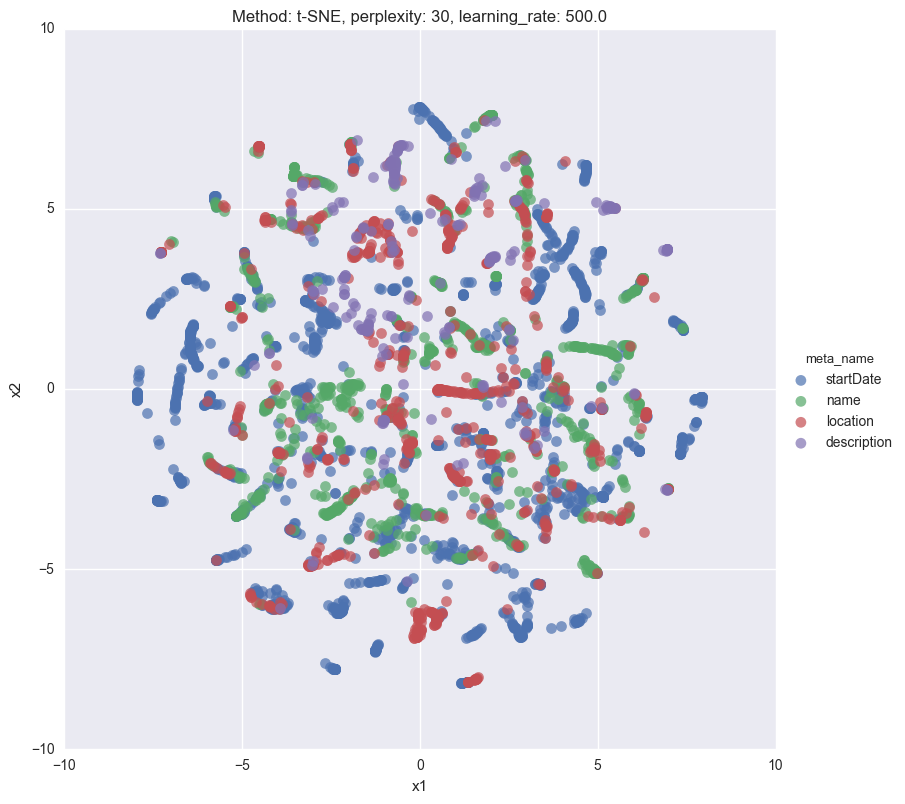

In [36]:
method = 't-SNE'
perplexity=30
learning_rate=500.0
model = TSNE(n_components=2,
           random_state=0,
           perplexity=perplexity,
           learning_rate=learning_rate)
title = 'Method: {}, perplexity: {}, learning_rate: {}'.format(method, perplexity, learning_rate)
model_fit = run_dim_reduction_and_draw(X_tr, y, model, title)

array([[-0.6488181 , -0.02068015],
       [-0.61194515, -0.01953384],
       [-0.62748767, -0.02006736],
       ..., 
       [-0.48079405, -0.01866119],
       [-0.03425282, -0.01295587],
       [-1.27098398, -0.02923946]])

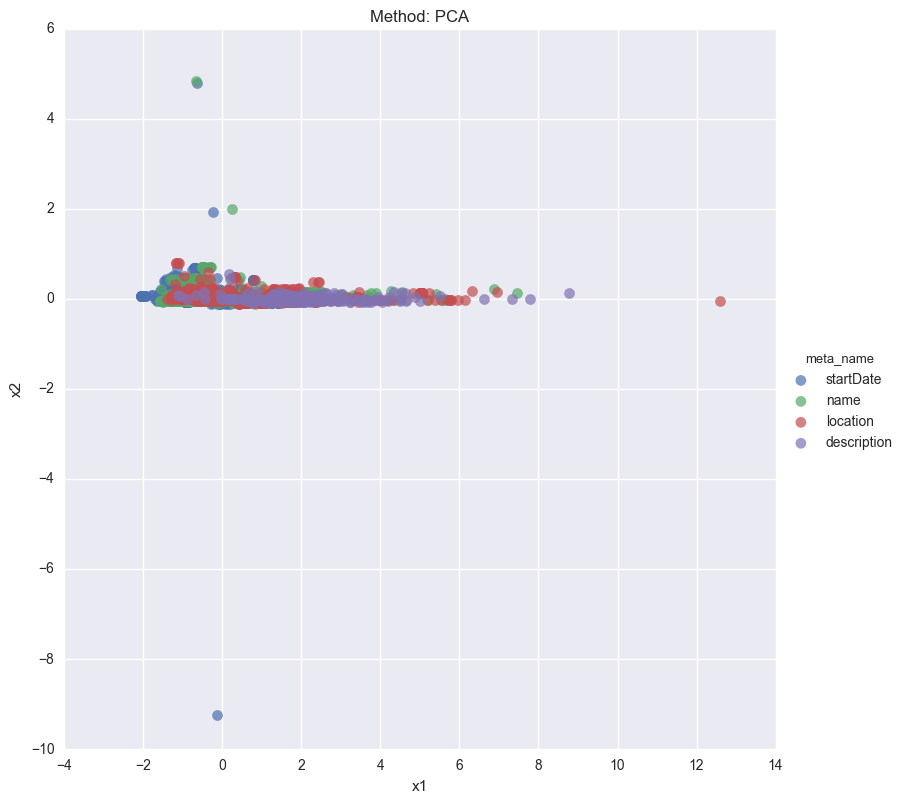

In [38]:
model = IncrementalPCA(n_components=2, batch_size=3)
title = 'Method: PCA'
run_dim_reduction_and_draw(X_tr, y, model, title)

array([[-0.24207002,  1.11077844],
       [-0.26933246,  1.01837436],
       [-0.24080022,  1.05099856],
       ..., 
       [-0.3914451 ,  0.08779668],
       [-0.56444948, -0.45531751],
       [-0.48738976,  1.3138107 ]])

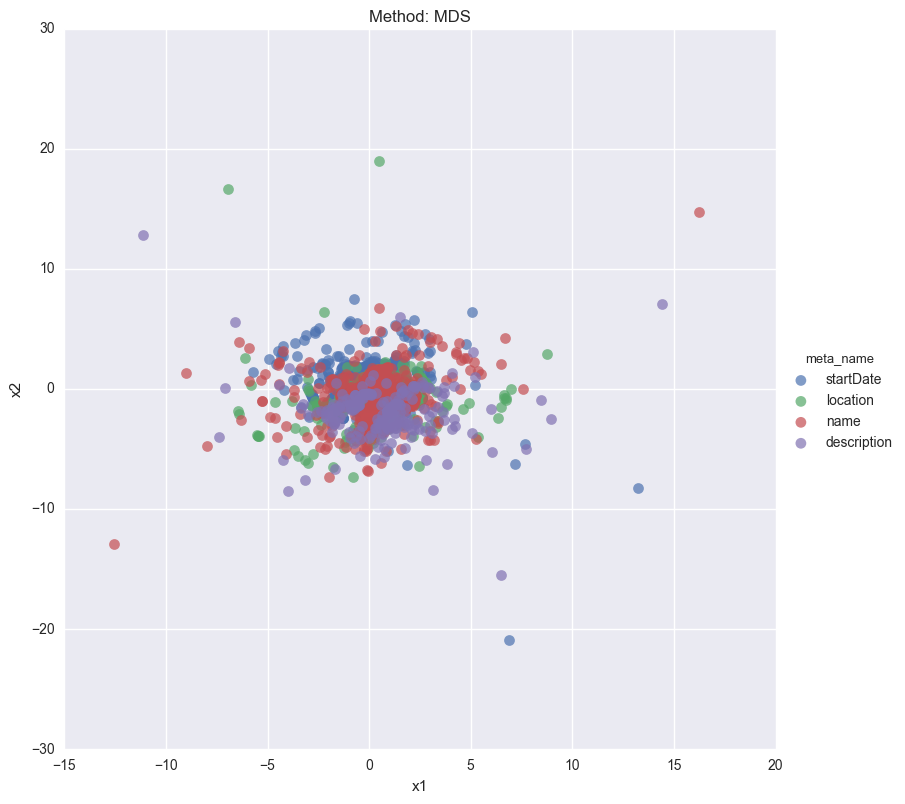

In [40]:
model = manifold.MDS(n_components=2, max_iter=100, n_init=1)
title = 'Method: MDS'
run_dim_reduction_and_draw(X_tr, y, model, title)

Dimensionality reduction did not show clear clusters, that means that either the fieatures are not well saparable or these methods don't shoe the structure and we need more complicated methods and classifiers for the data. 
Good exmplanations are here: 

http://distill.pub/2016/misread-tsne/
https://www.quora.com/Is-it-indistinguishable-if-t-SNE-method-does-not-show-clear-two-clusters-for-2-class-classification-problem-1

In [17]:
def get_XY_tsne(field_name, data):
    df_pos = data[data['meta_name'] == field_name]
    df_neg = data[data['meta_name'] != field_name]
    
    no_field_smpl = df_neg.sample(n = df_pos.shape[0], random_state=0)
    real_meta = no_field_smpl.meta_name 
    no_field_smpl = no_field_smpl.drop('meta_name', 1)
    no_field_smpl.insert(1, 'meta_name', 'no_'+ field_name)
    X_field = pd.concat((df_pos, no_field_smpl), axis=0)
    y = X_field['meta_name']
    X_field = X_field.drop('meta_name', 1)
    X_field = X_field.replace('none', 'NA')
    
    X = X_field
    
    X['y'] = y
    X = X.convert_objects(convert_numeric=True).dropna()
    y = X['y']
    X = X.drop('y', 1)
    return X, y, real_meta

In [18]:
def perform_analysis_tsne(X, y, clf, field_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)
    clf.fit(X_train, y_train)
    print('{} prediction'.format(field_name))
    print("train: {}, test: {}".format(clf.score(X_train, y_train), clf.score(X_test, y_test)))
    draw_feature_importance(clf, X_train, field_name)

### Dim reduction for X with additional text features

Let's do the same dim reduction but with additional text features from notebook "Analysis 3". We will see if the result differs from the first try. 

In [19]:
data_cl = clean_df(data_t)

In [290]:
data_cl

,url,meta_name,text,x_coords,y_coords,block_height,block_width,tag,num_child,num_siblings,...,max-height,stroke-width,buffered-rendering,text_str,text_len,num_punctuation,num_digits,digits_share,num_upper,num_space
0,http://www.therapeutenfinder.com/veranstaltung...,description,Ein Sonntag in jedem 2. Monat ab 18 Uhr\r\rFür...,52,653,636,288,div,NaN,4,...,auto,normal,stretch,Ein Sonntag in jedem 2. Monat ab 18 Uhr\r\rFür...,681,16,16,0.023495,45,94
1,http://www.therapeutenfinder.com/veranstaltung...,startDate,12.07.2015,142,1528,15,64,span,NaN,1,...,auto,normal,stretch,12.07.2015,10,2,8,0.800000,0,0
2,http://www.therapeutenfinder.com/veranstaltung...,location,Ort:\rWürzstr. 1\r \r\r81371 \rMünchen,57,1573,45,278,li,NaN,6,...,auto,normal,stretch,Ort:\rWürzstr. 1\r \r\r81371 \rMünchen,33,2,6,0.181818,3,7
3,http://www.ticketbis.com/jp/morrisey-%E3%83%8B...,name,Morrissey (モリッシー) Dallas,26,851,14,157,span,NaN,1,...,auto,normal,stretch,Morrissey (モリッシー) Dallas,24,2,0,0.000000,2,2
4,http://www.ticketbis.com/jp/morrisey-%E3%83%8B...,startDate,2017. 4. 15 - 土 20:00,26,865,17,160,time,NaN,4,...,auto,normal,stretch,2017. 4. 15 - 土 20:00,26,4,11,0.423077,0,10
5,http://www.ticketbis.com/jp/morrisey-%E3%83%8B...,location,"Majestic Theatre Dallas, Dallas, ...",26,882,26,160,div,NaN,4,...,auto,normal,stretch,"Majestic Theatre Dallas, Dallas, ...",66,2,0,0.000000,4,30
7,http://www.volksfeste-in-deutschland.de/doelke...,name,Dölker Mühlenfest in Viersen OT Dülken 2017,10,365,55,380,h1,NaN,8,...,auto,normal,stretch,Dölker Mühlenfest in Viersen OT Dülken 2017,43,0,4,0.093023,6,6
8,http://www.volksfeste-in-deutschland.de/doelke...,description,Das Mühlenfest in Viersen OT Dülken hält hält ...,10,425,286,380,p,NaN,8,...,auto,normal,stretch,Das Mühlenfest in Viersen OT Dülken hält hält ...,608,9,0,0.000000,35,93
10,http://www.volksfeste-in-deutschland.de/doelke...,location,Alter Markt om Ortsteil Dülken\r\r41751\r Viersen,15,1164,46,370,div,NaN,1,...,auto,normal,stretch,Alter Markt om Ortsteil Dülken\r\r41751\r Viersen,46,0,5,0.108696,5,8
12,https://bxl.demosphere.eu/rv/3412\n,location,Lieu :BruxellesIHECSRue de l'Etuve 58-601000 B...,616,174,250,362,div,NaN,5,...,auto,normal,stretch,Lieu :BruxellesIHECSRue de l'Etuve 58-601000 B...,73,3,10,0.136986,10,9


In [291]:
data_cl = data_cl[['meta_name','x_coords','y_coords','block_height','block_width',
                   'num_siblings', 'tag', 'text_len', 'num_punctuation','num_digits',
                   'digits_share','num_upper','num_space']]
num_features = ['x_coords','y_coords','block_height','block_width',
                   'num_siblings', 'text_len', 'num_punctuation','num_digits',
                   'digits_share','num_upper','num_space']
X, y, le_tag = prepare_num_XY(data_cl, num_features)

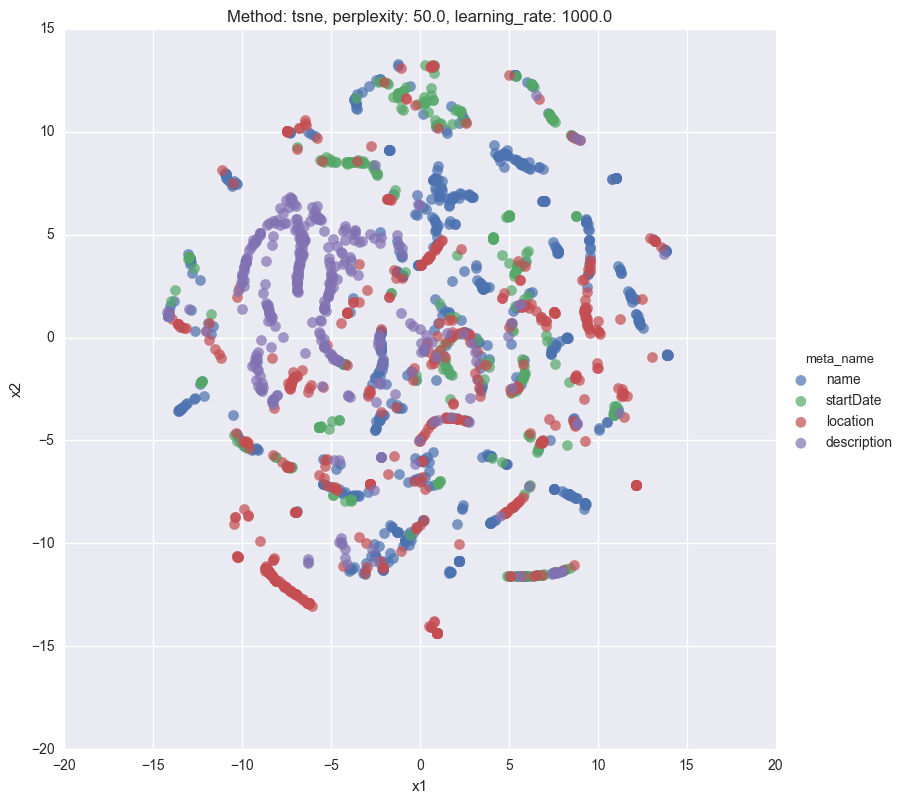

In [295]:
run_dim_reduction_and_draw(X, y, 50.0, 1000.0)

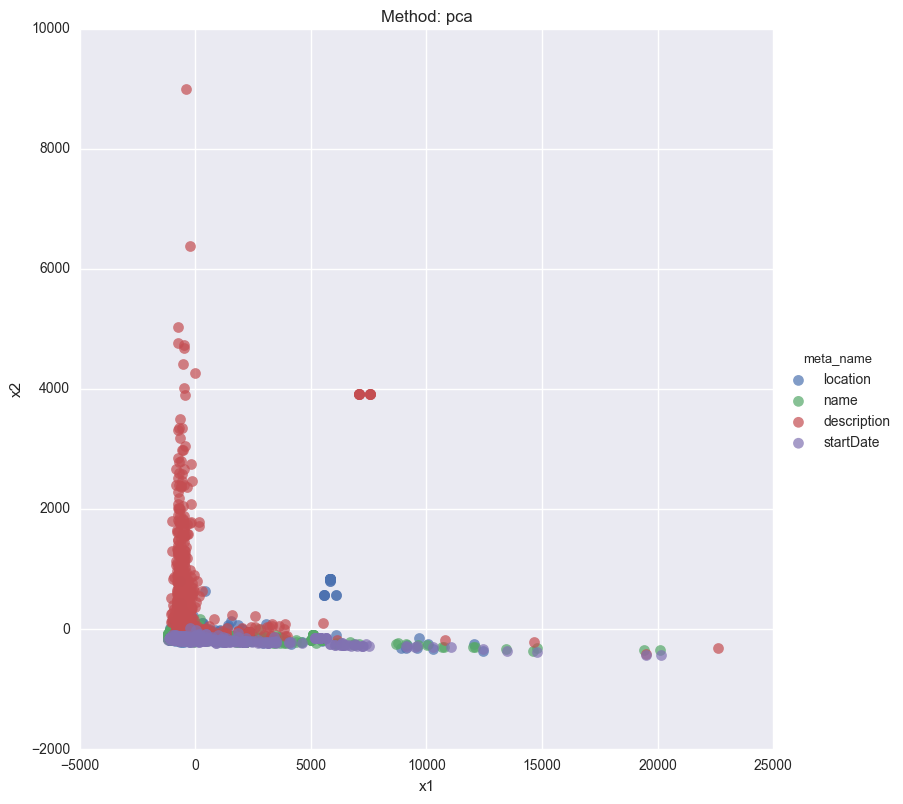

In [297]:
run_dim_reduction_and_draw(X, y, method='pca')

We see that description is already looks more or less like a cluster. Probably the important field was a text length.

## t-sne only for text-related fields

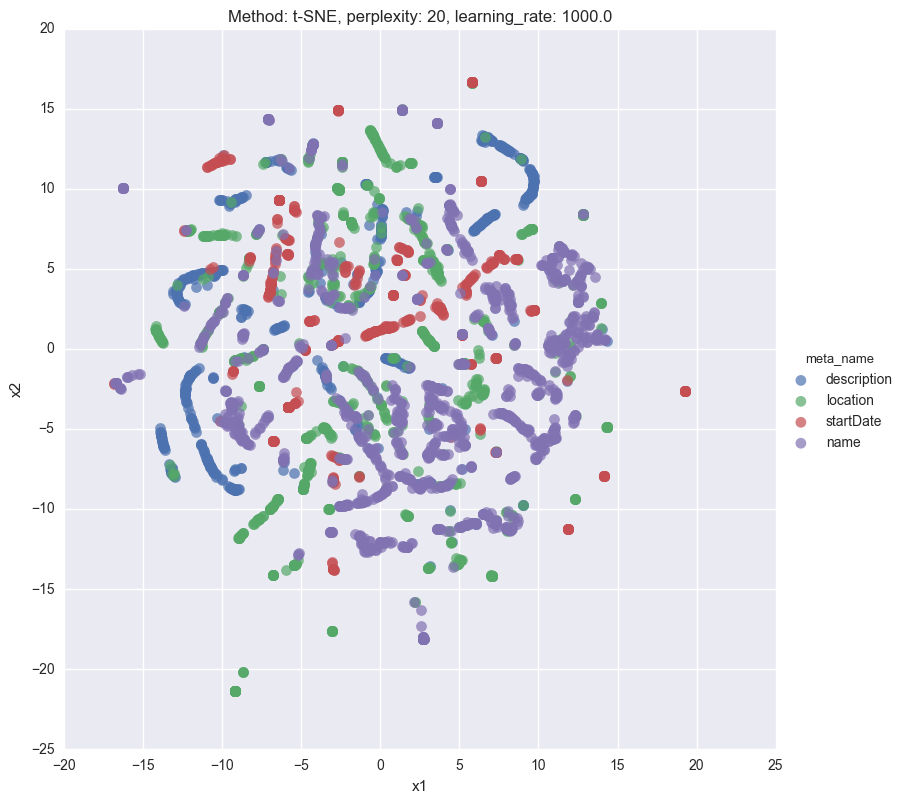

In [305]:
perplexity=20
learning_rate=1000.0

model = TSNE(n_components=2,
           random_state=0,
           perplexity=perplexity,
           learning_rate=learning_rate, n_iter=200)
title = 'Method: t-SNE, perplexity: {}, learning_rate: {}'.format(perplexity, learning_rate)
run_dim_reduction_and_draw(X.iloc[:,5:], y, model, title)

### PCA

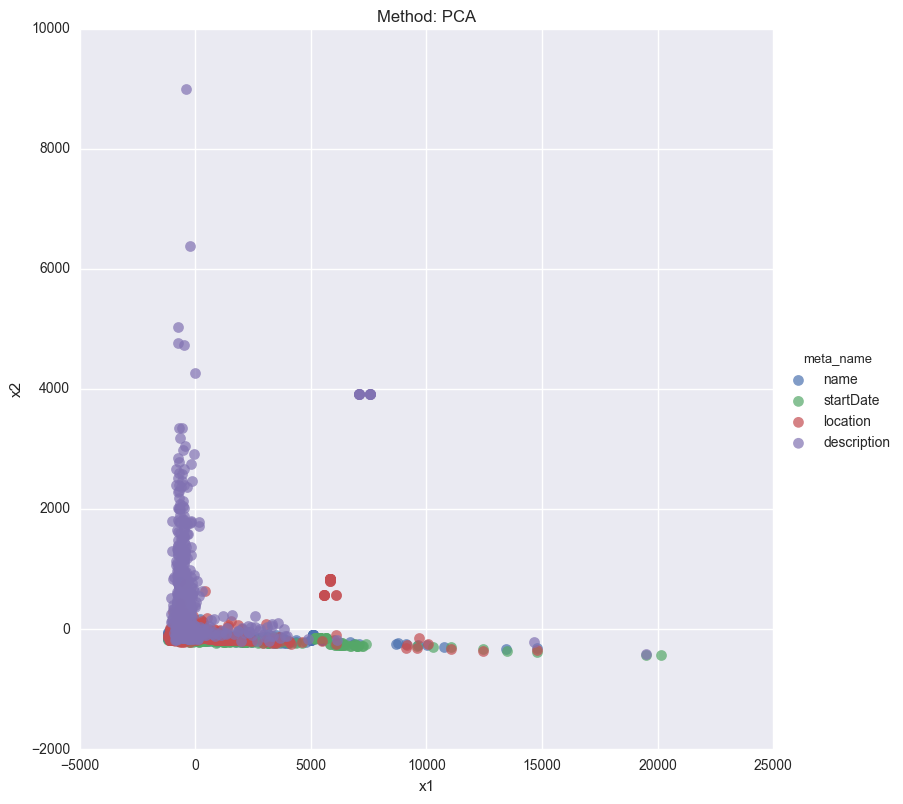

In [306]:
model = IncrementalPCA(n_components=2, batch_size=3)
title = 'Method: PCA'
run_dim_reduction_and_draw(X, y, model, title)

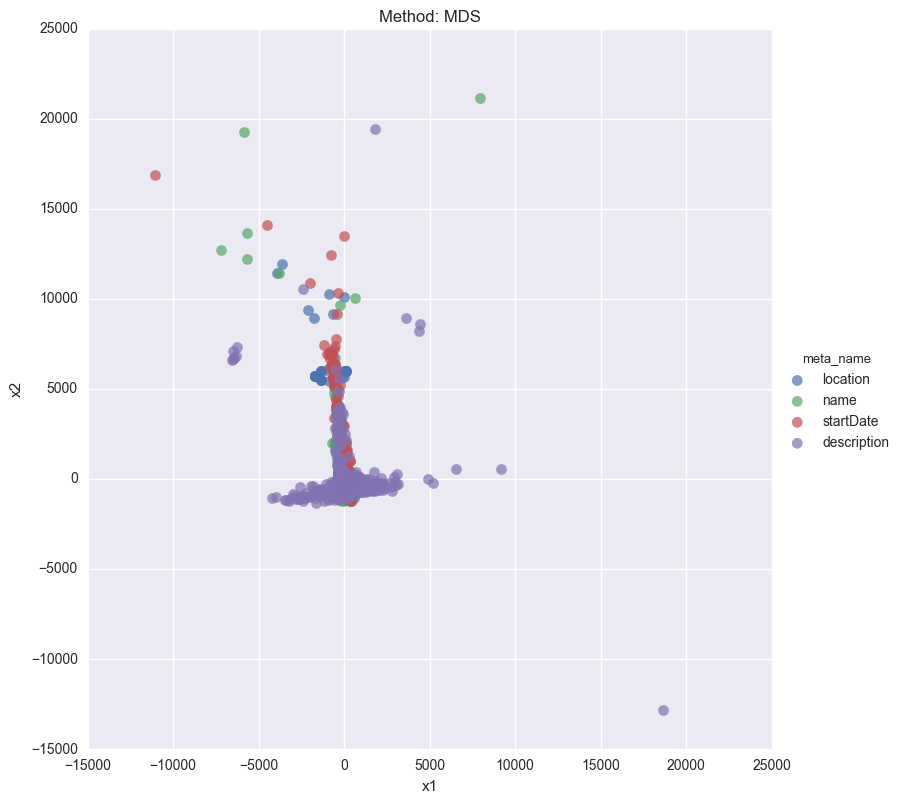

In [308]:
model = manifold.MDS(n_components=2, max_iter=300, n_init=1)
title = 'Method: MDS'
run_dim_reduction_and_draw(X, y, model, title)

In [344]:
%store -r X_t

### Dimensionality reduction for TF-IDF feature (sparse matrix)

In [345]:
X_t_df = pd.DataFrame(X_t.toarray(), columns=range(28738))

In [346]:
X_t_df.shape

(6140, 28738)

In [347]:
data_t.shape

(6140, 304)

In [355]:
data_t.index = range(6140)
X_t_df.index = range(6140)

In [356]:
X_text = pd.concat([X_t_df, data_t], axis=1)

In [359]:
X_text_cl = clean_df(X_text)

In [364]:
X_t = X_text_cl.iloc[:,:28738]

In [365]:
y_t = X_text['meta_name']

#### PCA for tf-idf

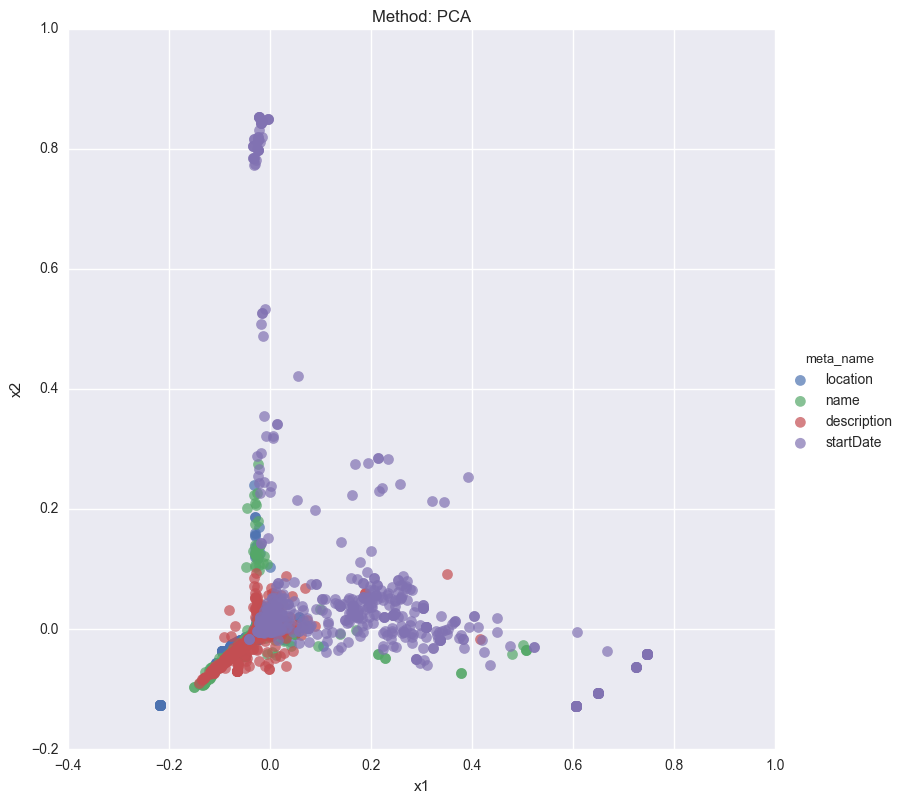

In [366]:
model = IncrementalPCA(n_components=2, batch_size=3)
title = 'Method: PCA'
run_dim_reduction_and_draw(X_t, y_t, model, title)

#### t-SNE for tf-idf

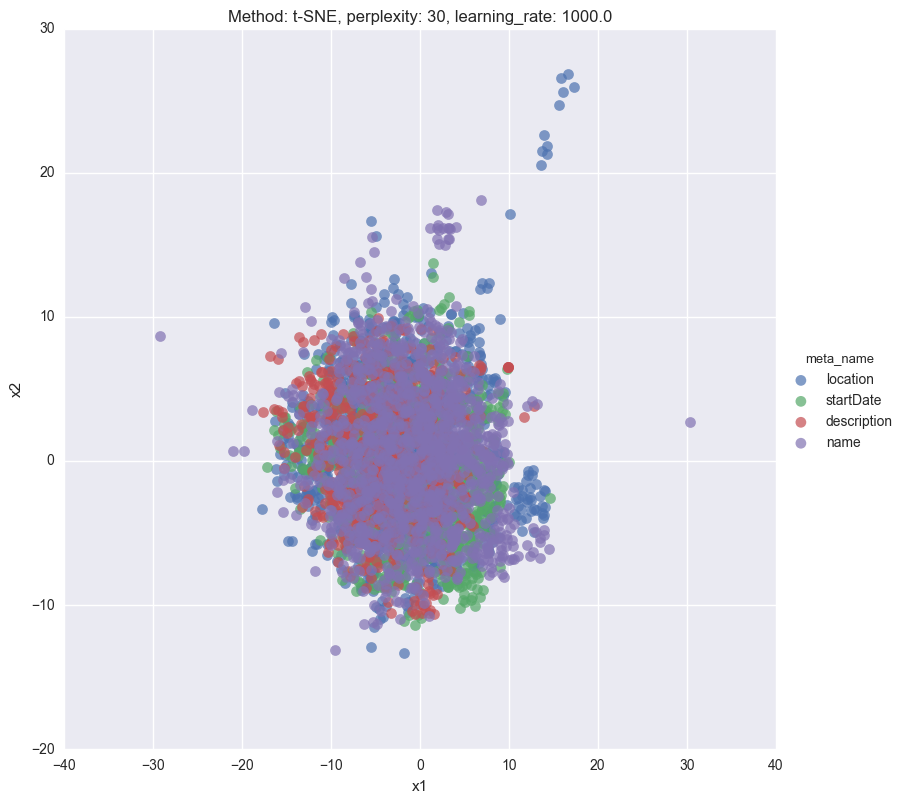

In [369]:
perplexity=30
learning_rate=1000.0

model = TSNE(n_components=4,
           random_state=0,
           perplexity=perplexity,
           learning_rate=learning_rate, n_iter=200)
title = 'Method: t-SNE, perplexity: {}, learning_rate: {}'.format(perplexity, learning_rate)
X_model = run_dim_reduction_and_draw(X_t, y_t, model, title)